In [28]:
import pandas as pd
import numpy as np

# Load data from the CSV file
file_path = '/kaggle/input/titanic-dataset/Titanic-Dataset.csv'
titanic_data = pd.read_csv(file_path)


In [29]:
# Fill missing values
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median())
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])

# Remove duplicates
titanic_data.drop_duplicates(inplace=True)

# Drop irrelevant and complex features like 'Cabin' which could complicate the model
titanic_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)


In [30]:
# Encode categorical variables
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})
titanic_data['Embarked'] = titanic_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Create new features
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1
titanic_data['Fare_Per_Person'] = titanic_data['Fare'] / (titanic_data['FamilySize'] + 1)

# Replace infinite values with NaN and then fill them with median
titanic_data.replace([np.inf, -np.inf], np.nan, inplace=True)
titanic_data['Fare_Per_Person'] = titanic_data['Fare_Per_Person'].fillna(titanic_data['Fare_Per_Person'].median())


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


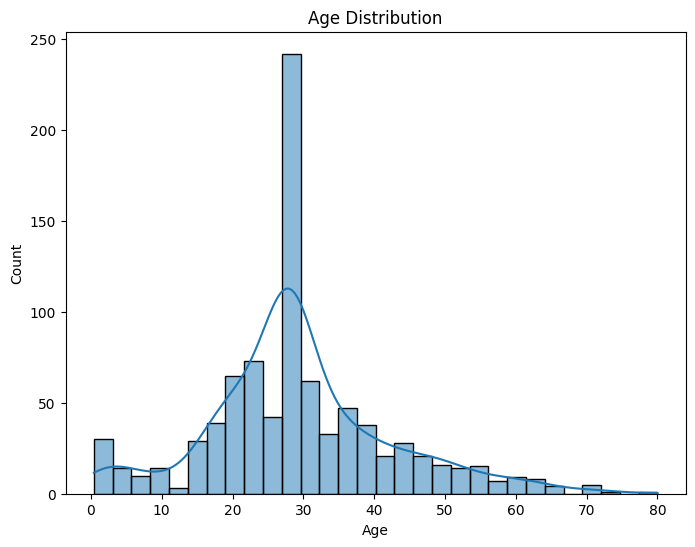

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


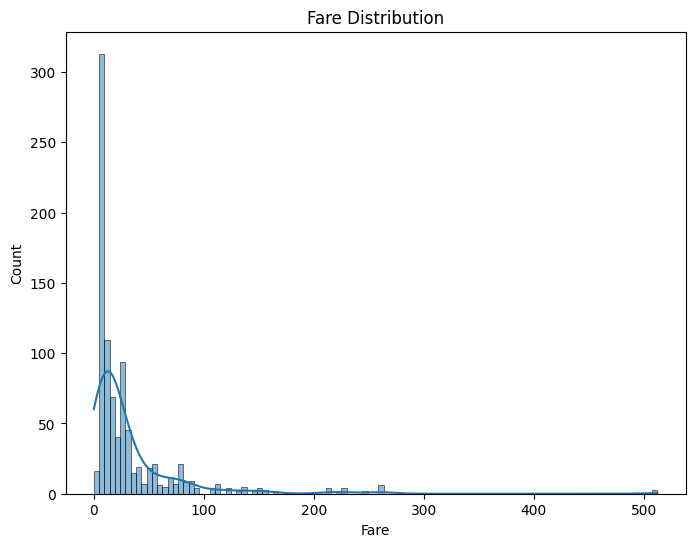

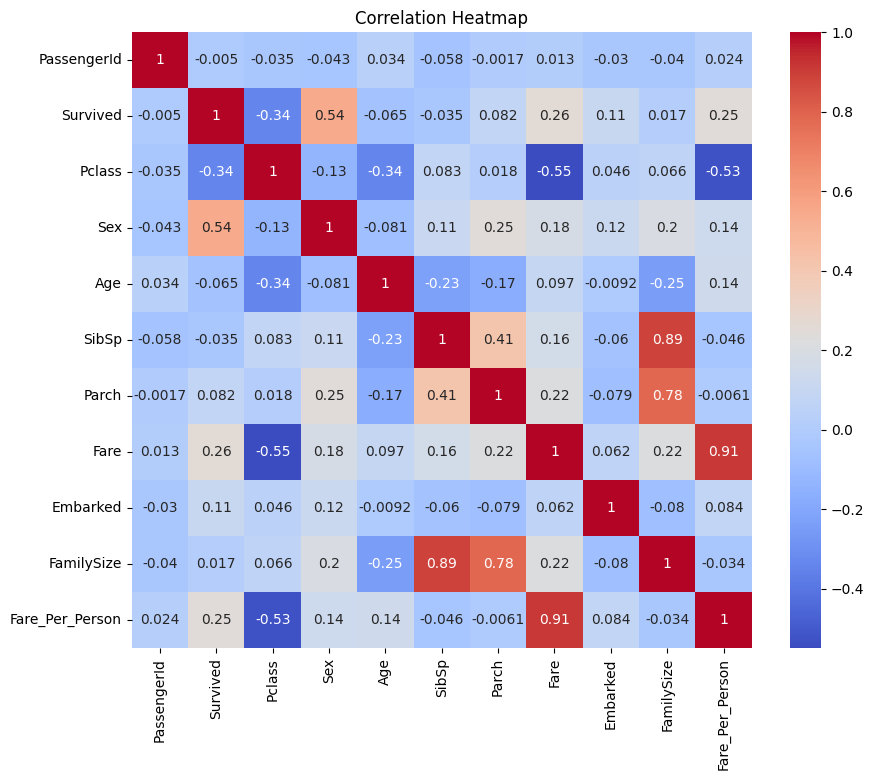

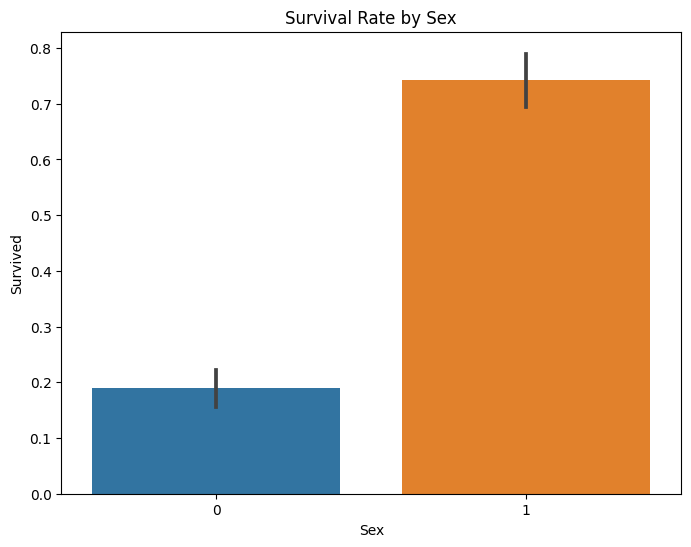

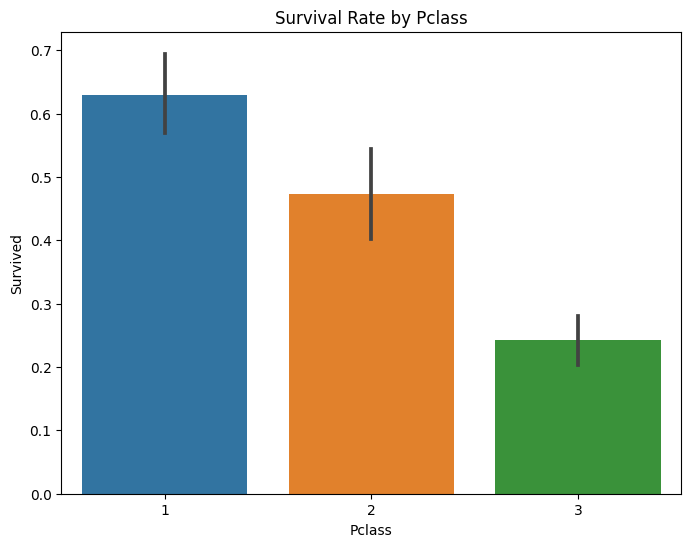

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the Age feature
plt.figure(figsize=(8, 6))
sns.histplot(titanic_data['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Plot the distribution of the Fare feature
plt.figure(figsize=(8, 6))
sns.histplot(titanic_data['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(titanic_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Visualize survival rate by sex
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=titanic_data)
plt.title('Survival Rate by Sex')
plt.show()

# Visualize survival rate by Pclass
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=titanic_data)
plt.title('Survival Rate by Pclass')
plt.show()


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into training and test sets
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Logistic Regression Model Accuracy: 0.7988826815642458
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

ROC AUC Score: 0.8768339768339769


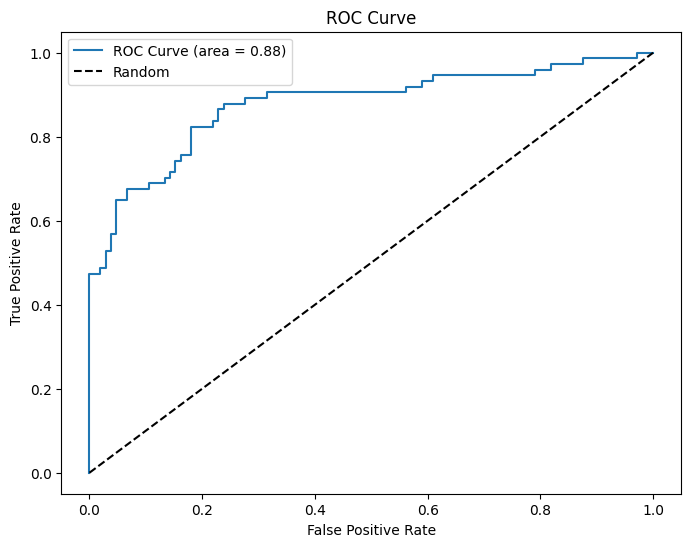

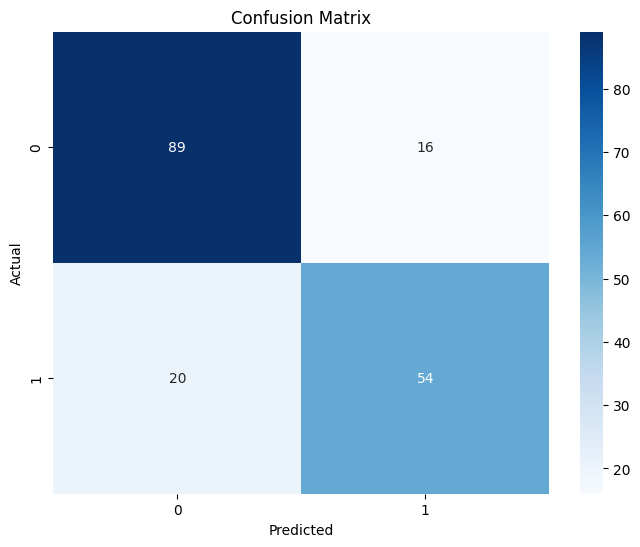

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix

# Train Logistic Regression model with regularization to reduce overfitting
lr_model = LogisticRegression(max_iter=500, C=0.5, random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test_scaled)
y_pred_prob = lr_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

print("Logistic Regression Model Accuracy:", accuracy)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


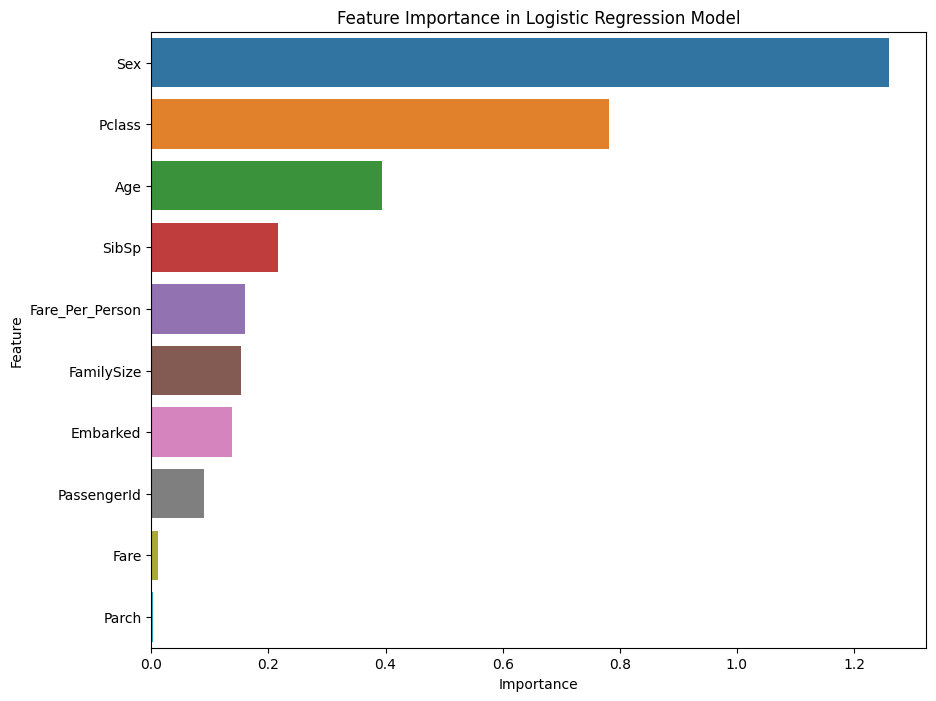

In [34]:
# Retrieve feature importances from the logistic regression model
feature_importance = abs(lr_model.coef_[0])
feature_names = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Logistic Regression Model')
plt.show()
